<a href="https://colab.research.google.com/github/Kalazclint/HdayBuzz-ContentClassifier/blob/main/Holiday_Buzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csv_file = '/content/drive/My Drive/dataset/train.csv'

In [5]:
img_file = '/content/drive/My Drive/dataset/train/'


In [6]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [7]:
df = pd.read_csv(csv_file)
df.head()



,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [8]:
df['Class'].value_counts()


Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

## **Loading Data**

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [10]:
image_folder_path = '/content/drive/My Drive/dataset/train/'
image_size = (128, 128)

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_folder_path,
    x_col="Image",
    y_col="Class",
    target_size=image_size,
    batch_size=20,
    subset='training',
    class_mode='categorical'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_folder_path,
    x_col="Image",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)


Found 4140 validated image filenames belonging to 6 classes.
Found 258 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


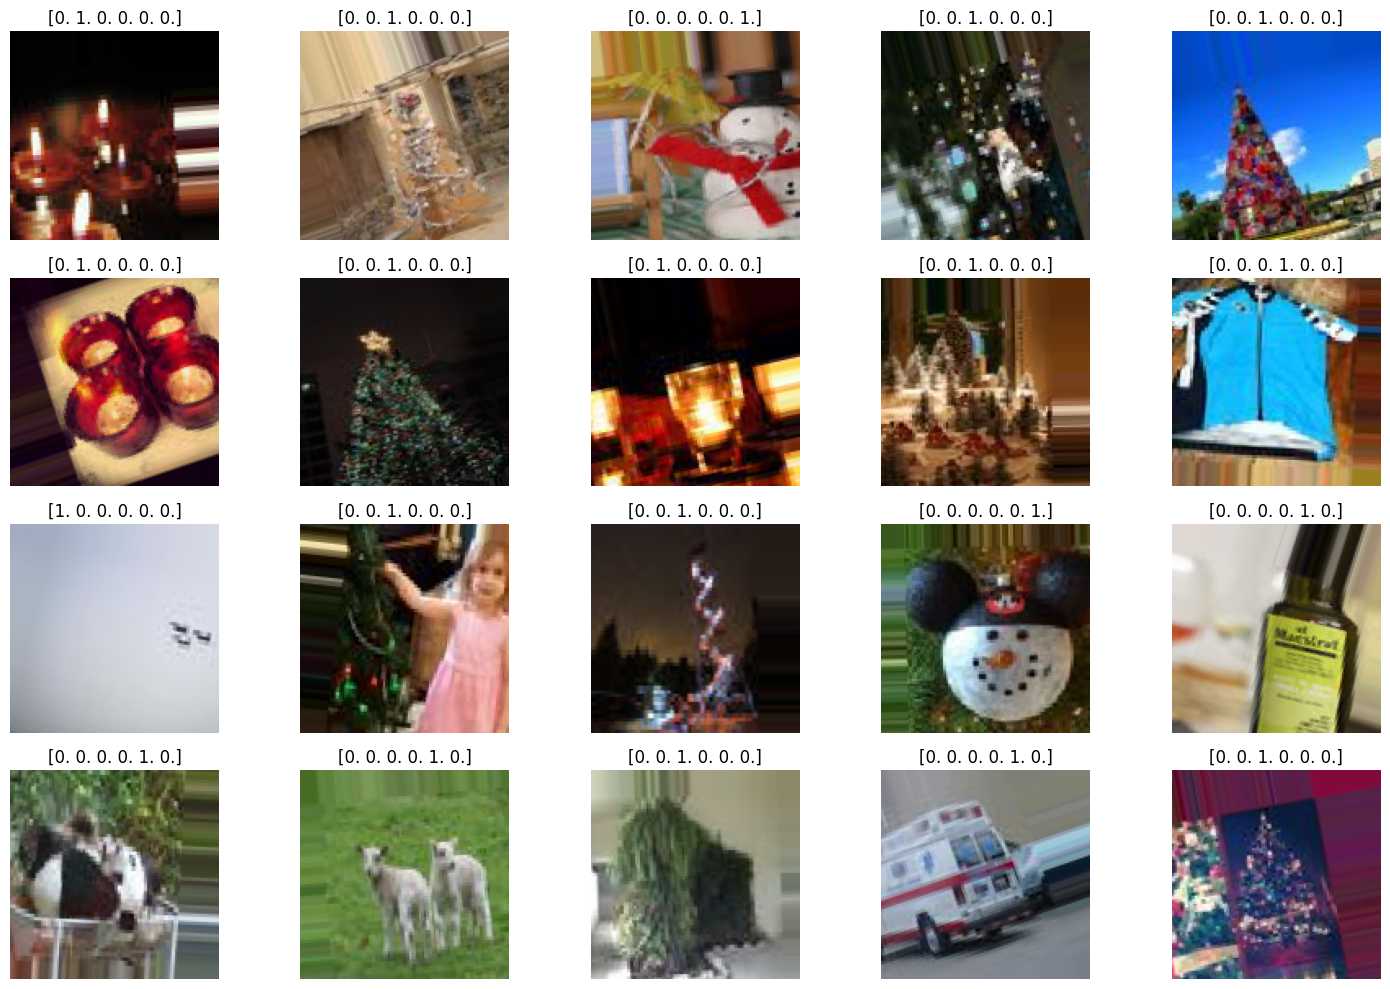

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    image, label = train_generator.next()
    ax.imshow(image[0])
    ax.set_title(label[0])
    ax.axis('off')

plt.tight_layout()
plt.show()


## **CNN Architecture**

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [12]:
from keras.layers import BatchNormalization, Dropout

model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth convolutional block
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Added Dropout layer

# Output layer
model.add(Dense(6, activation='softmax'))


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth convolutional block
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Sixth convolutional block (Newly added)
model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Added Dropout layer

# Output layer
model.add(Dense(6, activation='softmax'))


ValueError: ignored

In [15]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth convolutional block
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Sixth convolutional block (Newly added)
model.add(Conv2D(1024, (2, 2), activation='relu'))
model.add(BatchNormalization())
# No MaxPooling2D here

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Added Dropout layer

# Output layer
model.add(Dense(6, activation='softmax'))


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.fit(train_generator, epochs=50, validation_data=validation_generator)


Epoch 1/50
207/207 [==============================] - 1685s 8s/step - loss: 2.2706 - accuracy: 0.3961 - val_loss: 3.5374 - val_accuracy: 0.4690
Epoch 2/50
207/207 [==============================] - 246s 1s/step - loss: 1.4875 - accuracy: 0.4853 - val_loss: 1.5236 - val_accuracy: 0.5233
Epoch 3/50
207/207 [==============================] - 244s 1s/step - loss: 1.2675 - accuracy: 0.5394 - val_loss: 1.2221 - val_accuracy: 0.5736
Epoch 4/50
207/207 [==============================] - 244s 1s/step - loss: 1.1673 - accuracy: 0.5800 - val_loss: 1.3834 - val_accuracy: 0.5930
Epoch 5/50
207/207 [==============================] - 238s 1s/step - loss: 1.1188 - accuracy: 0.5915 - val_loss: 1.1309 - val_accuracy: 0.6163
Epoch 6/50
207/207 [==============================] - 238s 1s/step - loss: 1.0648 - accuracy: 0.6116 - val_loss: 1.2343 - val_accuracy: 0.6008
Epoch 7/50
207/207 [==============================] - 241s 1s/step - loss: 1.0617 - accuracy: 0.6145 - val_loss: 1.3525 - val_accuracy: 0.507

UnknownError: ignored

In [18]:
# Step 5: Model Evaluation
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

9/9 [==============================] - 4s 404ms/step - loss: 0.7531 - accuracy: 0.7674
Test loss: 0.7530520558357239
Test accuracy: 0.7674418687820435
